# Random Forest Regressor

In [8]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [9]:
DATA_PATH = 'data/'
X_train = pd.read_csv(f'{DATA_PATH}X_train.csv',sep='\t', index_col='index')
X_test = pd.read_csv(f'{DATA_PATH}X_test.csv', sep='\t', index_col='index')
y_train = pd.read_csv(f'{DATA_PATH}y_train.csv',sep='\t', index_col='index')
y_test = pd.read_csv(f'{DATA_PATH}y_test.csv',sep='\t', index_col='index')
X_train

,DT,t вып-обр,t продувка,ПСН гр.,чист расход C,чист расход Cr,чист расход Mn,чист расход Si,чист расход V,температура первая,...,химшлак первый Al2O3_1,химшлак первый CaO_1,химшлак первый FeO_1,химшлак первый MgO_1,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO
index,,,,,,,,,,,,,,,,,,,,,
1345,0.045902,0.277778,0.151702,0.581533,0.552824,0.577689,0.489449,0.321557,0.544953,0.946763,...,0.266667,0.457364,0.022901,0.446541,0.035443,0.243243,0.535714,0.090909,0.432099,0.070922
1348,0.034426,0.166667,0.176602,0.564977,0.548431,0.445760,0.342336,0.319108,0.504157,0.957048,...,0.191667,0.544574,0.011450,0.342767,0.035443,0.243243,0.633929,0.227273,0.237654,0.056738
1662,0.032787,0.066667,0.171865,0.427685,0.579356,0.400086,0.328152,0.271466,0.504327,0.970357,...,0.258333,0.600775,0.022901,0.367925,0.022785,0.378378,0.455357,0.136364,0.290123,0.042553
1663,0.032787,0.122222,0.181474,0.558538,0.555062,0.398125,0.418505,0.271393,0.499817,0.929220,...,0.241667,0.554264,0.049618,0.317610,0.037975,0.270270,0.566964,0.227273,0.234568,0.070922
1783,0.027869,0.388889,0.157047,0.572136,0.436474,0.417696,0.410133,0.184686,0.481947,0.931034,...,0.141667,0.453488,0.045802,0.242138,0.063291,0.324324,0.406250,0.090909,0.256173,0.078014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7015,0.083607,0.166667,0.168009,0.400654,0.637199,0.350768,0.256984,0.337714,0.520077,0.959468,...,0.250000,0.567829,0.015267,0.276730,0.017722,0.297297,0.549107,0.181818,0.290123,0.063830
7018,0.029508,0.233333,0.153664,0.440235,0.564295,0.369832,0.284885,0.331017,0.518582,0.943739,...,0.258333,0.620155,0.007634,0.267296,0.027848,0.351351,0.526786,0.181818,0.145062,0.042553
7021,0.031148,0.255556,0.174098,0.308073,0.640466,0.407959,0.313318,0.340733,0.548467,0.961887,...,0.216667,0.558140,0.038168,0.345912,0.032911,0.324324,0.517857,0.409091,0.268519,0.035461


In [10]:
rfr = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
}
clf = GridSearchCV(rfr, param_grid, scoring= 'r2', cv = 5, verbose = 3, n_jobs= 2)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   45.5s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:  2.2min
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:  5.2min
[Parallel(n_jobs=2)]: Done 375 out of 375 | elapsed:  7.3min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=2,
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='r2', verbose=3)

In [11]:
pred = clf.predict(X_test)
r2_score(y_test, pred)

0.38761373219407724

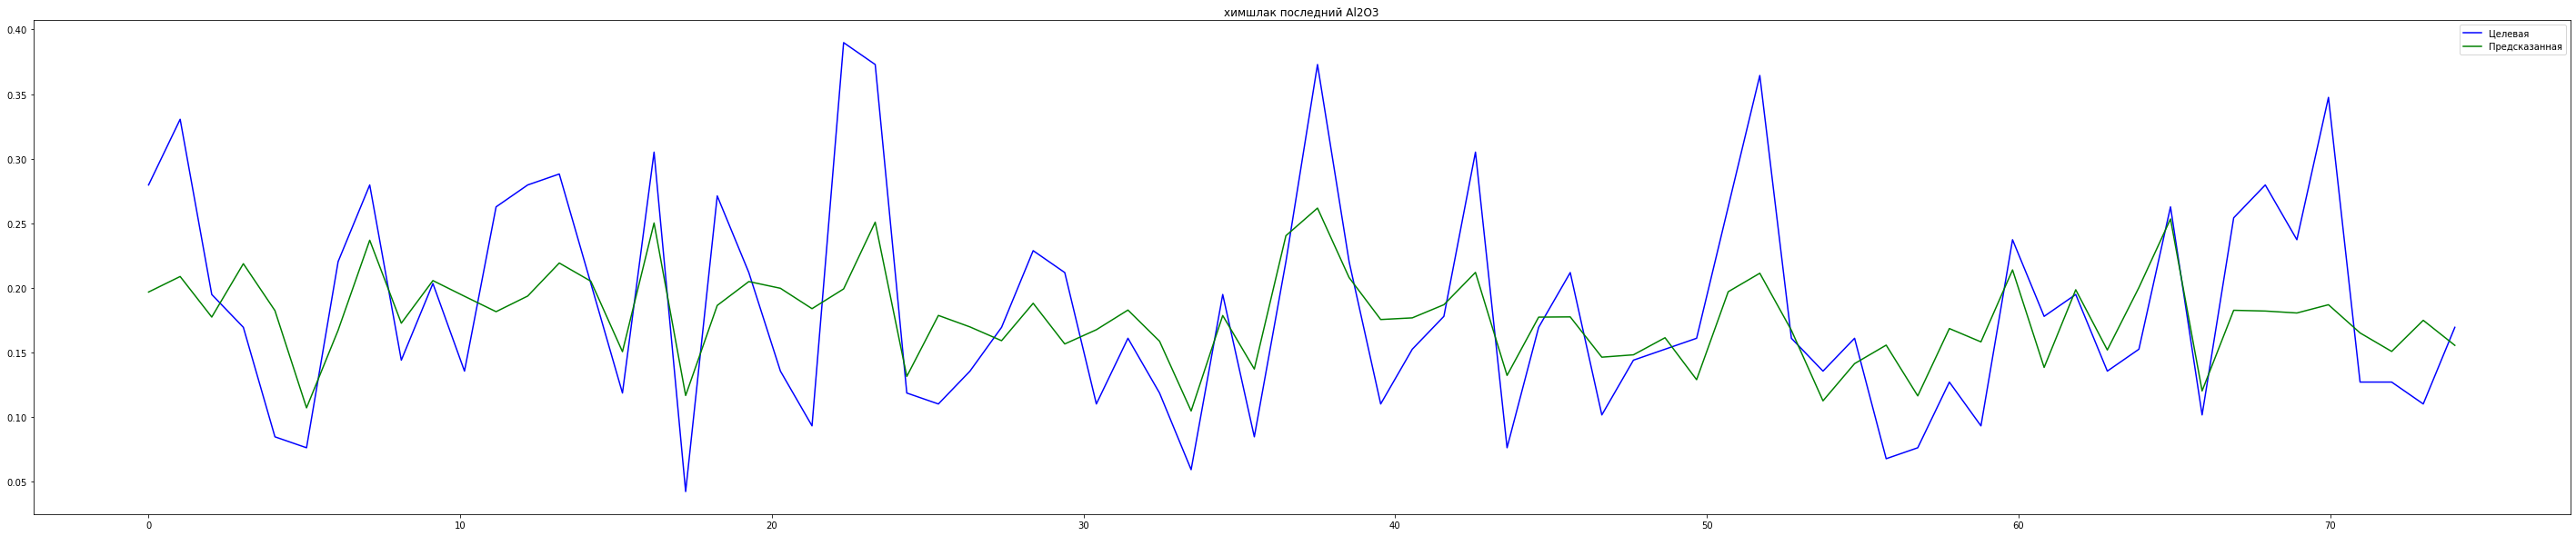

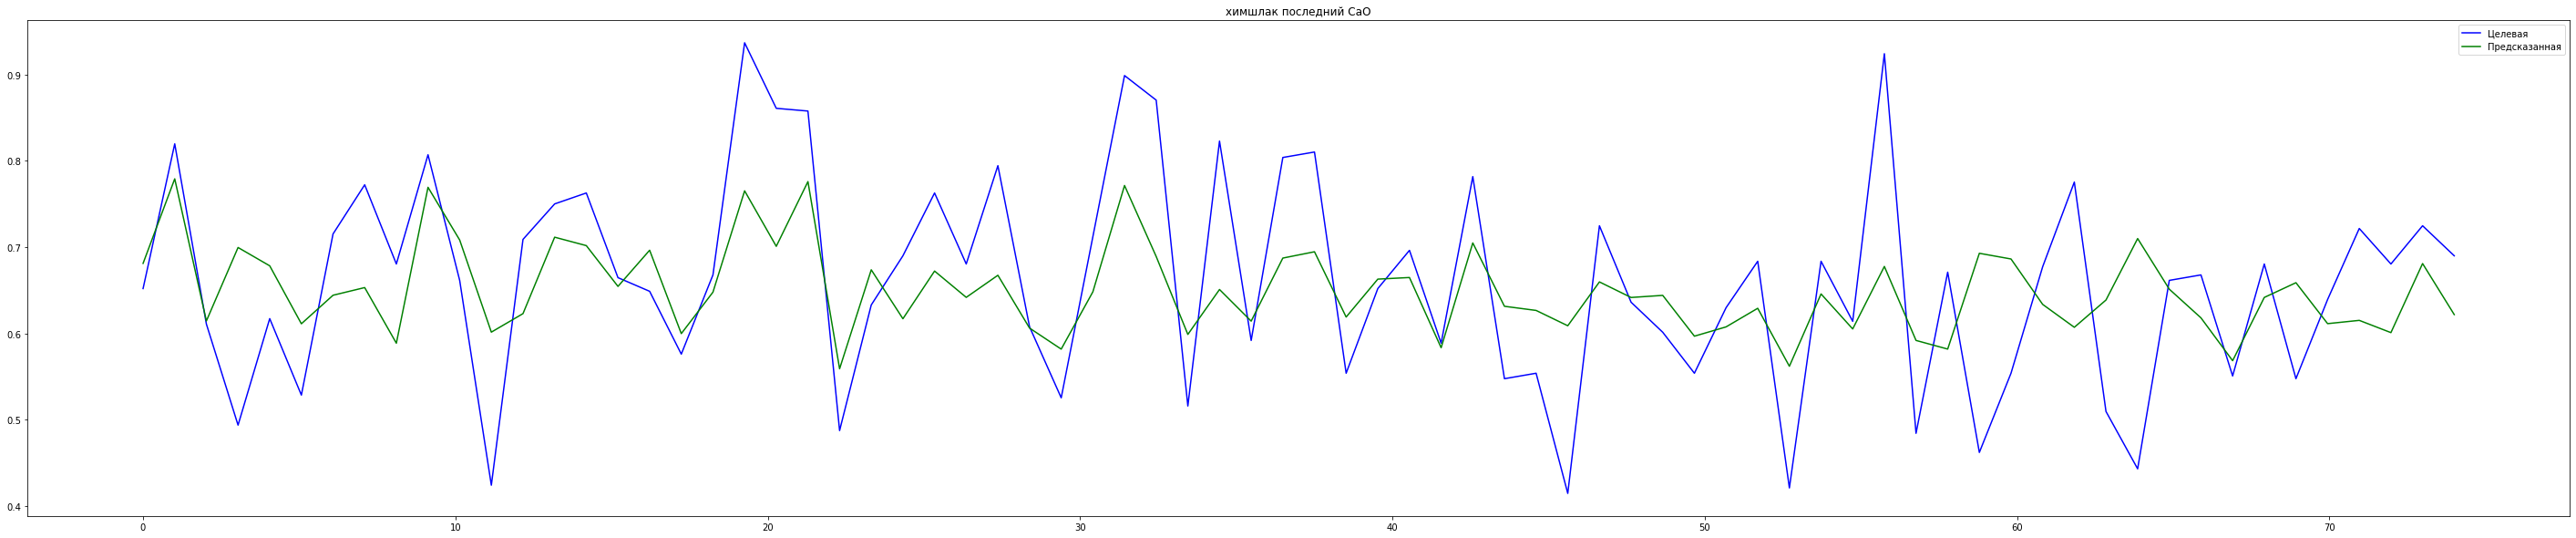

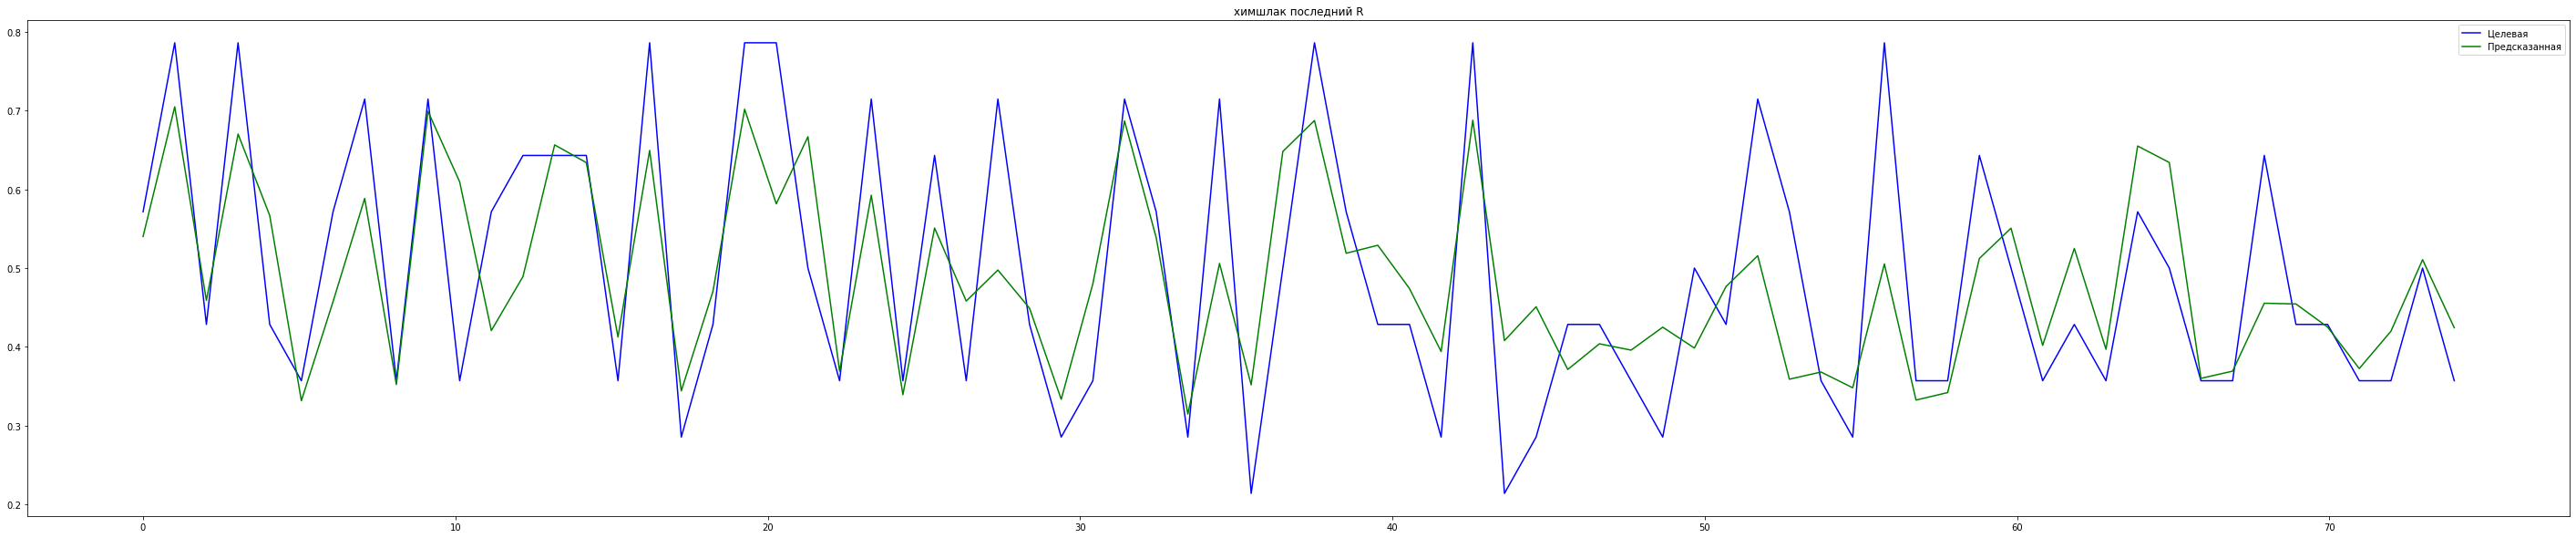

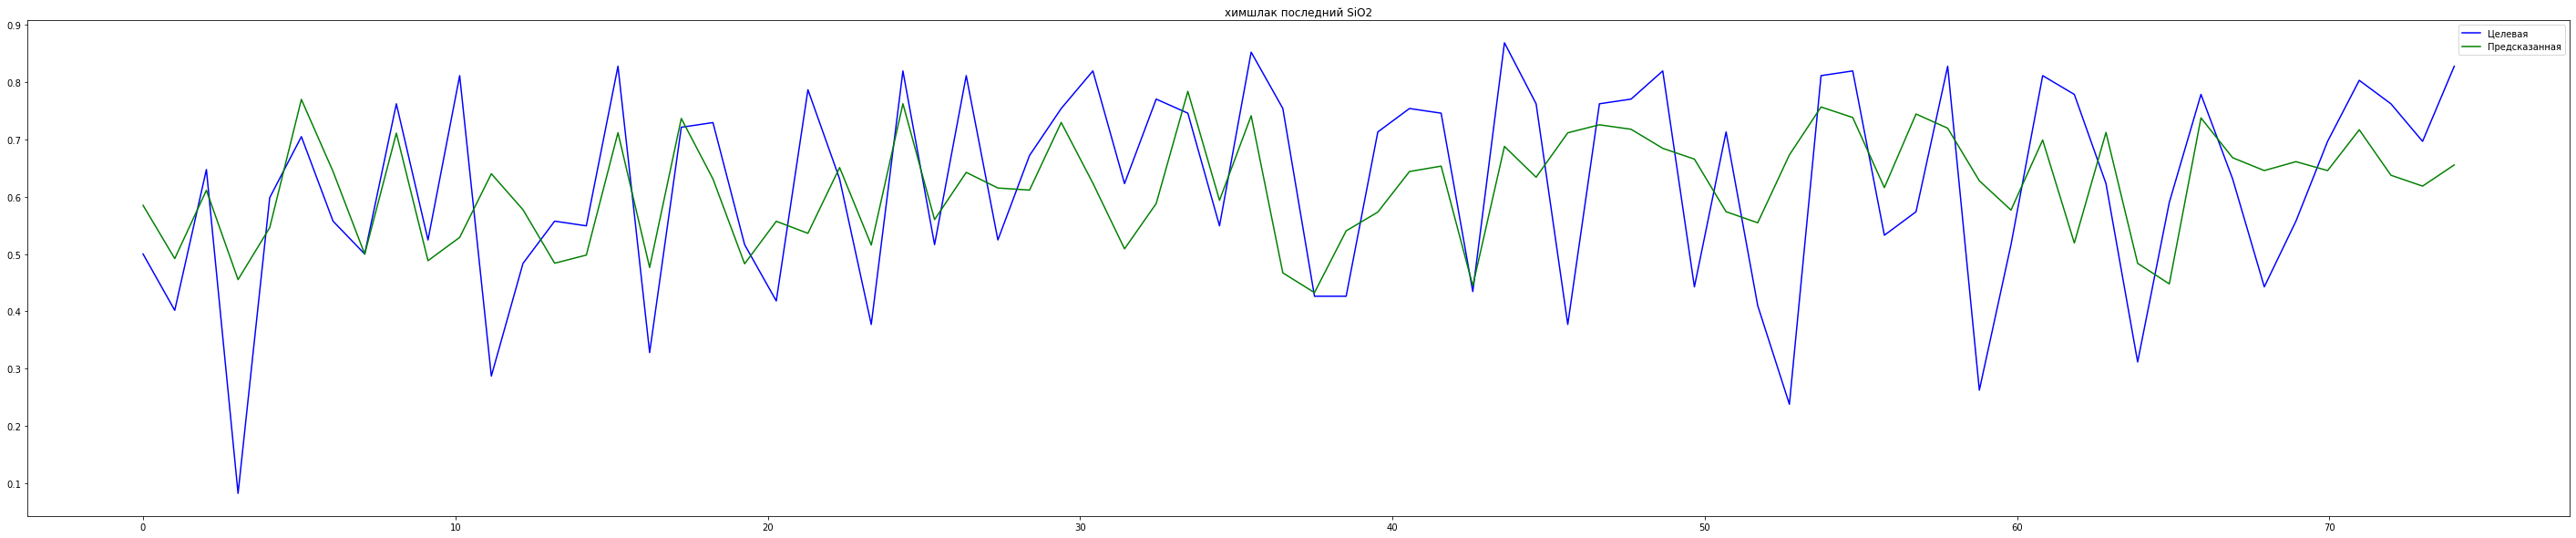

In [12]:
from subfunc import show_result

show_result(pred, y_test)


